### Let's consider a Organization was able to raise $100,000,000 funds . W e need to assign those funds to different countries across the globe and accomdate them with necessary facilities.
### As a Data Scientist, I need to figure out what amount of funds to be allocated to each country.
### Based on the Attributes in our dataset, we perform some necessary tasks required for the problem statement.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The data is in this form
1. **country**
Name of the country

2. **child_mort**
Death of children under 5 years of age per 1000 live births

3. **exports**
Exports of goods and services per capita. Given as %age of the GDP per capita

4. **health**
Total health spending per capita. Given as %age of GDP per capita

5. **imports**
Imports of goods and services per capita. Given as %age of the GDP per capita

6. **income**
Net income per person

7. **inflation**
The measurement of the annual growth rate of the Total GDP

8. **life_expec**
The average number of years a new born child would live if the current mortality patterns are to remain the same

9. **total_fer**
The number of children that would be born to each woman if the current age-fertility rates remain the same.

10. **gdpp**
The GDP per capita. Calculated as the Total GDP divided by the total population.

In [2]:
data = pd.read_csv(r'C:\Users\91950\Downloads\archive (19)\Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.isna()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False,False


In [4]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
correlation_matrix = data.corr(numeric_only = True)
correlation_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


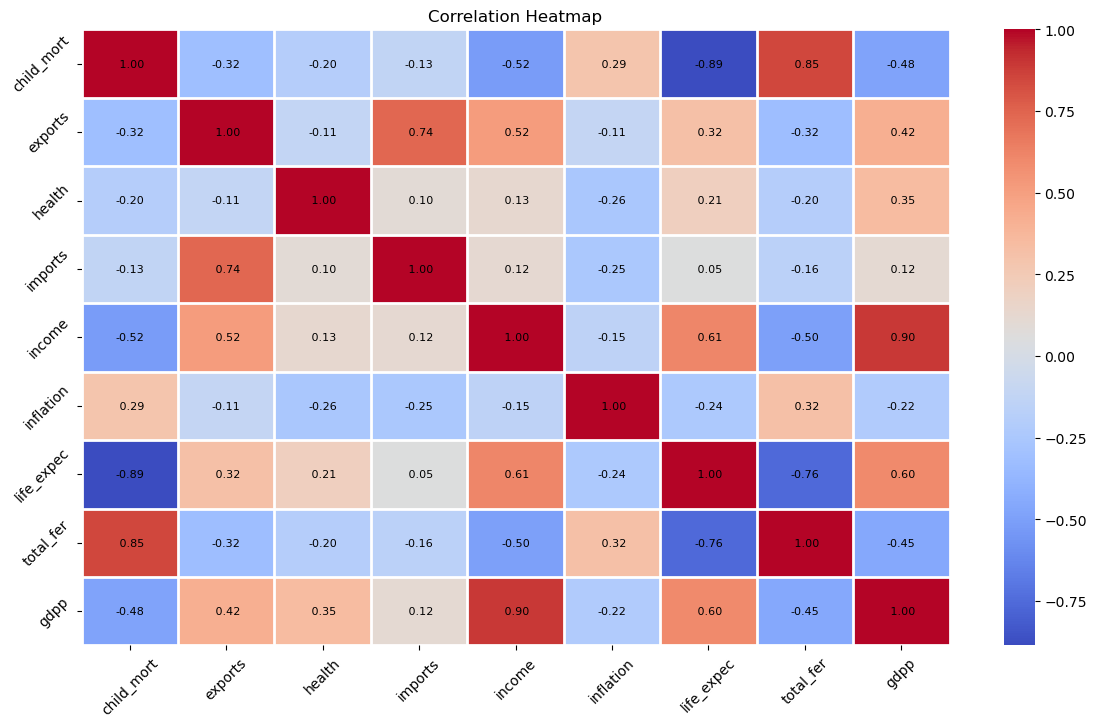

In [9]:
plt.figure(figsize = (14,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = f"{correlation_matrix.iloc[i,j] : .2f}"
        plt.text(j+0.5,i+0.5,text,ha="center",va="center",fontsize=8)
plt.title('Correlation Heatmap')
for k in range(len(correlation_matrix)+1):
    plt.axhline(k,color="white",linewidth=2)
    plt.axvline(k,color="white",linewidth=2)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

In [11]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
numerical_attributes = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
numerical_data = data[numerical_attributes]
numerical_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
X=numerical_data.drop("child_mort",axis=1)
X.head()

,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [14]:
y=data["child_mort"]
y.head()

0     90.2
1     16.6
2     27.3
3    119.0
4     10.3
Name: child_mort, dtype: float64

In [15]:
model=RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [16]:
feature_importances = model.feature_importances_
feature_weights = feature_importances / feature_importances.sum()

In [17]:
feature_weights

array([0.01148838, 0.02535703, 0.01097907, 0.0388386 , 0.00887319,
       0.56627167, 0.30069222, 0.03749984])

### The feature importance array indicates how much each feature in your input data (X, excluding child_mort) contributes to predicting the target variable child_mort. Here's how you can interpret it:

In [18]:
numerical_attributes = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
scaler = StandardScaler()
x = scaler.fit_transform(data[numerical_attributes])

In [19]:
normalized_data = pd.DataFrame(x)
normalized_data

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [20]:
normalized_data.rename(columns = {0:"child_mort",1:"exports",2:"health",3
                                  :"imports",4:"income",5
                                  :"inflation",6:"life_expec",7:"total_fer",8:"gdpp"})

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [21]:
normalized_data.describe()

,0,1,2,3,4,5,6,7,8
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,2.127373e-16,5.504579e-16,2.765585e-16,-7.977650e-17,-1.063687e-17,3.696311e-16,3.044803e-16,5.850277e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)


In [24]:
#lets get the principal components analysis components
pca_components = pca.fit_transform(normalized_data)
pca_components

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: K

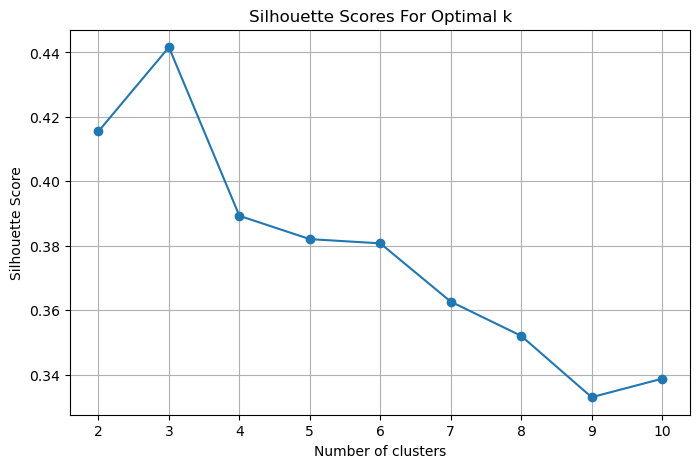

In [28]:
from sklearn.metrics import silhouette_score
k_range = range(2, 11)  

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_components)
    silhouette_avg = silhouette_score(pca_components, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## So,let's take no of clusters = 3

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [32]:

silhouette_avg = silhouette_score(pca_components, cluster_labels)
print(f"Silhouette Score with {2} PCA components and {3} clusters: {silhouette_avg}")


Silhouette Score with 2 PCA components and 3 clusters: 0.3387443305879294


In [33]:
cluster_labels = kmeans.fit_predict(pca_components)
cluster_labels

C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1])

In [34]:
import numpy as np

# Check the unique labels in cluster_labels
unique_labels = np.unique(cluster_labels)
print(f"Unique cluster labels: {unique_labels}")



Unique cluster labels: [0 1 2]


In [35]:
pca_components.shape

(167, 2)

In [36]:
cluster_labels.shape

(167,)

In [37]:
pca_data = pca_components
cluster_data = np.array(cluster_labels)

In [38]:
cluster_data

array([1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1])

In [39]:
pca_data.shape


(167, 2)

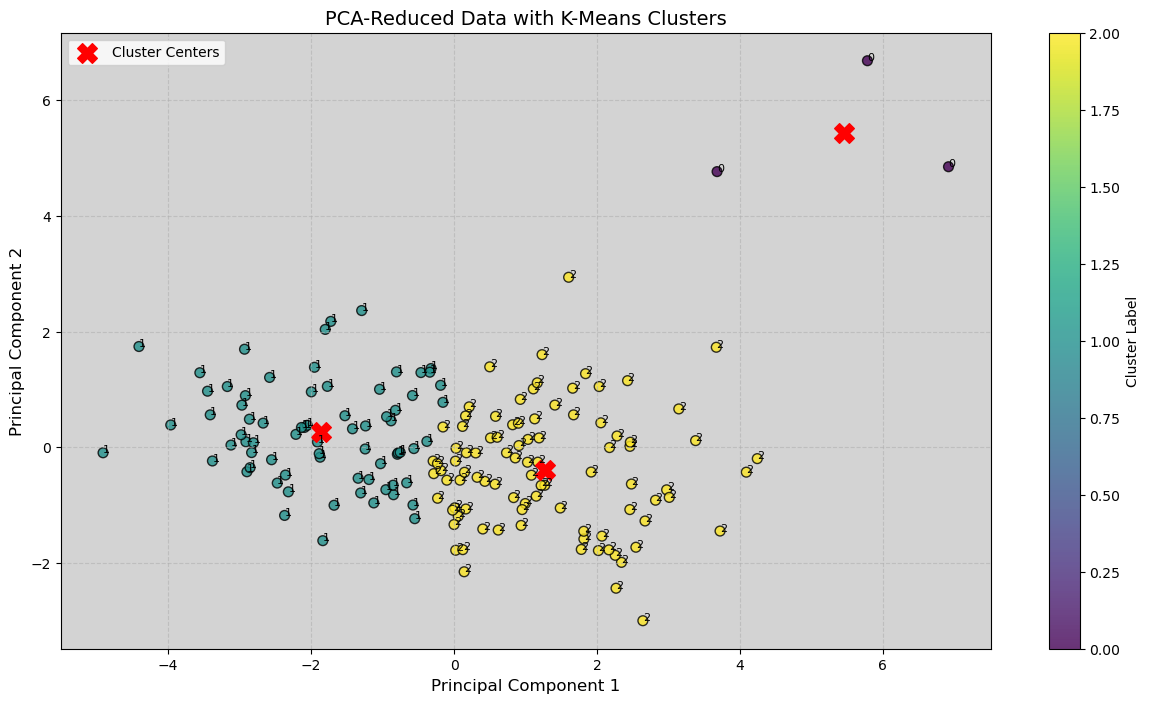

In [40]:
import matplotlib.pyplot as plt
import numpy as np



# Ensure the shapes are correct
assert pca_components.shape == (167, 2), "PCA data should have 2 dimensions."
assert cluster_labels.shape == (167,), "Cluster labels should match the number of PCA data points."

# Scatter plot for PCA data with cluster labels
plt.figure(figsize=(15, 8))
plt.scatter(
    pca_components[:, 0],  # Principal Component 1
    pca_components[:, 1],  # Principal Component 2
    c=cluster_labels,      # Color by cluster label
    cmap='viridis',        # Color map for better distinction
    s=50,                  # Marker size
    alpha=0.8,             # Transparency for better visibility
    edgecolor='k'          # Edge color for markers
)

# Add plot titles and labels
plt.title('PCA-Reduced Data with K-Means Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster Label')  # Add a color bar for cluster labels
plt.grid(True, linestyle='--', alpha=0.6)
cluster_centers = kmeans.cluster_centers_  # Use K-Means output
plt.scatter(
    cluster_centers[:, 0], 
    cluster_centers[:, 1], 
    c='red', 
    s=200, 
    marker='X', 
    label='Cluster Centers'
)
plt.legend()
for i, txt in enumerate(cluster_labels):
    plt.annotate(txt, (pca_components[i, 0], pca_components[i, 1]), fontsize=8)
plt.gca().set_facecolor("lightgrey")
plt.show()


In [41]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [42]:
cluster_labels = np.array(cluster_labels)
cluster_labels

array([1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1])

In [43]:
cluster_labels.dtype

dtype('int32')

In [44]:
data["clusters"]= cluster_labels

In [45]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
 10  clusters    167 non-null    int32  
dtypes: float64(7), int32(1), int64(2), object(1)
memory usage: 13.8+ KB


In [47]:
data["clusters"] = data["clusters"].astype("float")


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
 10  clusters    167 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


In [49]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,1.532934
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,0.535312
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,1.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,2.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,2.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,2.000000


In [50]:
# Example: Calculate mean for a specific feature like child mortality for each cluster
cluster_0_mean = data[data['clusters'] == 0]['child_mort'].mean()
cluster_1_mean = data[data['clusters'] == 1]['child_mort'].mean()
cluster_2_mean = data[data['clusters'] == 2]['child_mort'].mean()

print(f"Cluster 0 Mean Child Mortality: {cluster_0_mean}")
print(f"Cluster 1 Mean Child Mortality: {cluster_1_mean}")
print(f"Cluster 2 Mean Child Mortality: {cluster_2_mean}")


Cluster 0 Mean Child Mortality: 4.133333333333333
Cluster 1 Mean Child Mortality: 73.36388888888888
Cluster 2 Mean Child Mortality: 11.918478260869563


In [51]:
cluster_0_mean = data[data['clusters'] == 0]['gdpp'].mean()
cluster_1_mean = data[data['clusters'] == 1]['gdpp'].mean()
cluster_2_mean = data[data['clusters'] == 2]['gdpp'].mean()
print(f"Cluster 0 Mean gdpp: {cluster_0_mean}")
print(f"Cluster 1 Mean gdpp: {cluster_1_mean}")
print(f"Cluster 2 Mean gdpp: {cluster_2_mean}")

Cluster 0 Mean gdpp: 57566.666666666664
Cluster 1 Mean gdpp: 2178.6666666666665
Cluster 2 Mean gdpp: 19950.543478260868


In [52]:
cluster_0_mean = data[data['clusters'] == 0]['income'].mean()
cluster_1_mean = data[data['clusters'] == 1]['income'].mean()
cluster_2_mean = data[data['clusters'] == 2]['income'].mean()
print(f"Cluster 0 Mean income: {cluster_0_mean}")
print(f"Cluster 1 Mean income: {cluster_1_mean}")
print(f"Cluster 2 Mean income: {cluster_2_mean}")

Cluster 0 Mean income: 64033.333333333336
Cluster 1 Mean income: 4531.847222222223
Cluster 2 Mean income: 25486.630434782608


### This Means cluster 0 need less funds.
### cluster 1 needs the more funds
### cluster 2 needs the medium amount of funds

In [53]:
fund_distribution = {0: 0.2, 1: 0.5, 2: 0.3}
total_funds = 100000000

In [54]:
# Initialize a new column for allocated funds
data['Allocated Funds'] = 0

# Allocate funds for Cluster 0
cluster_0 = data[data['clusters'] == 0]
cluster_0_total = cluster_0['child_mort'].sum()  # Total child mortality for Cluster 0
for index, row in cluster_0.iterrows():
    # Proportional allocation based on child mortality
    allocated_fund = (row['child_mort'] / cluster_0_total) * (fund_distribution[0] * total_funds)
    data.at[index, 'Allocated Funds'] = allocated_fund

# Repeat for Cluster 1
cluster_1 = data[data['clusters'] == 1]
cluster_1_total = cluster_1['child_mort'].sum()
for index, row in cluster_1.iterrows():
    allocated_fund = (row['child_mort'] / cluster_1_total) * (fund_distribution[1] * total_funds)
    data.at[index, 'Allocated Funds'] = allocated_fund

# Repeat for Cluster 2
cluster_2 = data[data['clusters'] == 2]
cluster_2_total = cluster_2['child_mort'].sum()
for index, row in cluster_2.iterrows():
    allocated_fund = (row['child_mort'] / cluster_2_total) * (fund_distribution[2] * total_funds)
    data.at[index, 'Allocated Funds'] = allocated_fund



C:\Users\91950\AppData\Local\Temp\ipykernel_3208\84222094.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4516129.0322580645' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Allocated Funds'] = allocated_fund


In [55]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,Allocated Funds
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.0,8.538109e+05
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2.0,4.541724e+05
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2.0,7.469220e+05
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.0,1.126425e+06
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2.0,2.818057e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1.0,2.764000e+05
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1.0,1.618644e+05
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2.0,6.374829e+05
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1.0,5.329219e+05


In [ ]:
# Bar plot for funds allocated to each country
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Allocated Funds'], color='skyblue')
plt.title('Funds Allocated to Each Country', fontsize=14)
plt.xlabel('Country Index', fontsize=12)
plt.ylabel('Allocated Funds ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
data.describe()

In [ ]:
print(f"Total Allocated Funds: {data['Allocated Funds'].sum()}")


In [ ]:
cluster_funds = data.groupby('clusters')['Allocated Funds'].sum()
cluster_funds.plot(kind='bar', title='Funds Allocated to Each Cluster', color=['green', 'orange', 'blue'])
plt.ylabel('Allocated Funds ($)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
data.sort_values('Allocated Funds', ascending=False).plot(
    x='country', y='Allocated Funds', kind='bar', figsize=(40, 6), title='Funds Allocation Per Country'
)
plt.ylabel('Allocated Funds ($)')
plt.tight_layout()
plt.legend()
plt.show()
